In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Data Exploration
# Load the dataset
data = pd.read_csv("housing.csv")

In [3]:
# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
# Drop missing values
data.dropna(inplace=True)

In [5]:
# Display basic information about the dataset after dropping missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [6]:
# Splitting the data into features and target variable
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [7]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
# Join the features and target variable for training set for further analysis
train_data = X_train.join(y_train)

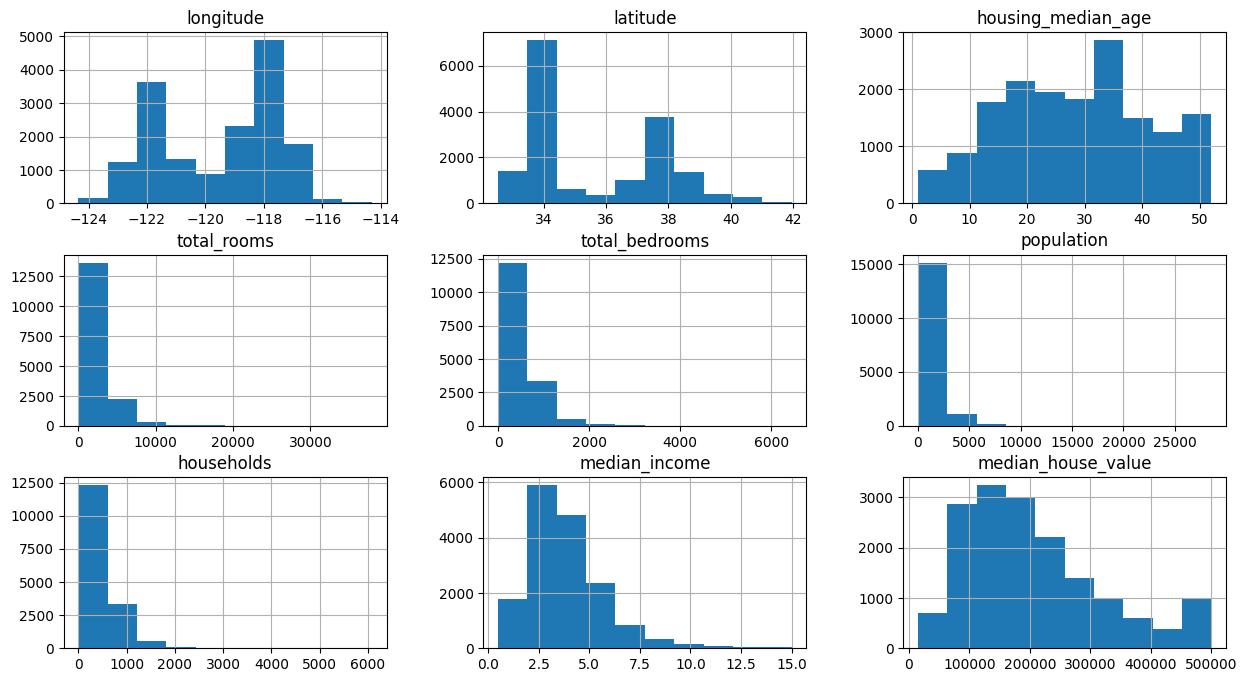

In [9]:
# Visualize the training data distribution
train_data.hist(figsize=(15, 8))
plt.show()

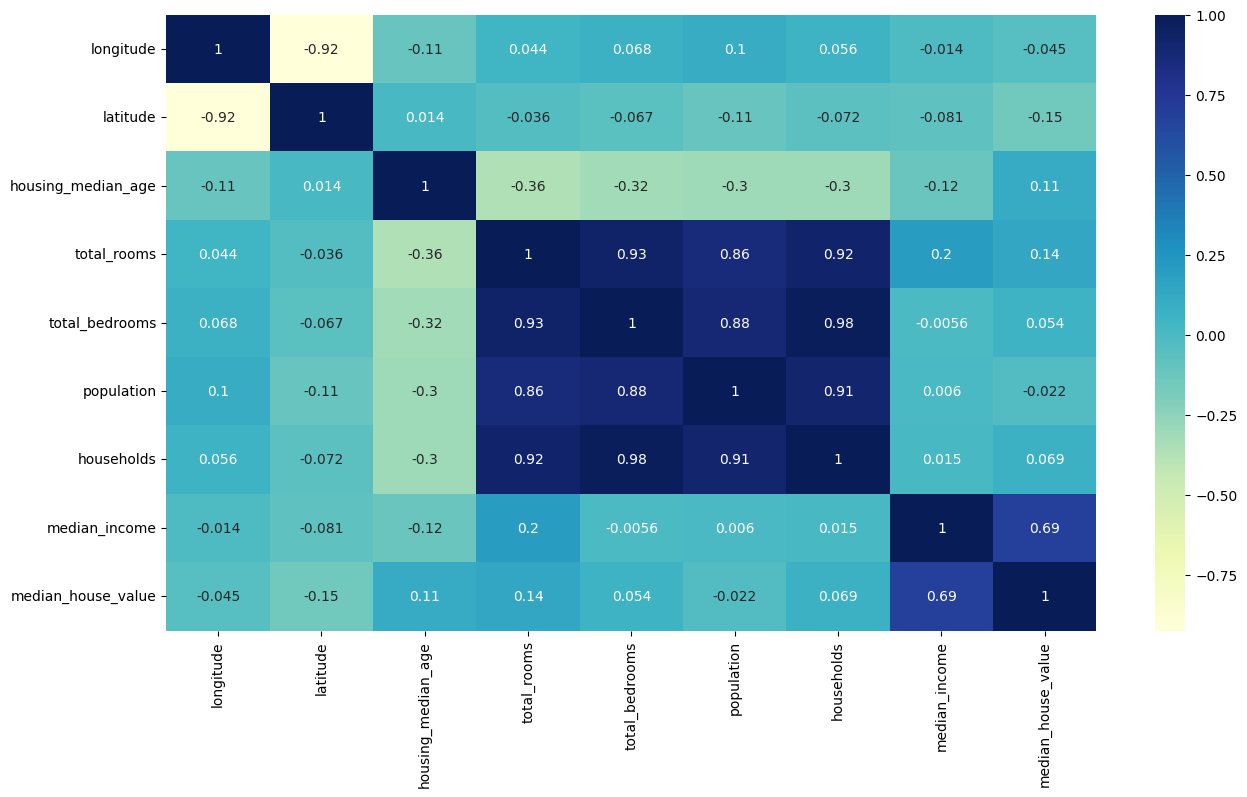

In [10]:
# Visualize the correlation matrix
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")
plt.show()

In [11]:
# Data Preprocessing
# Log transformation to normalize skewed data
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

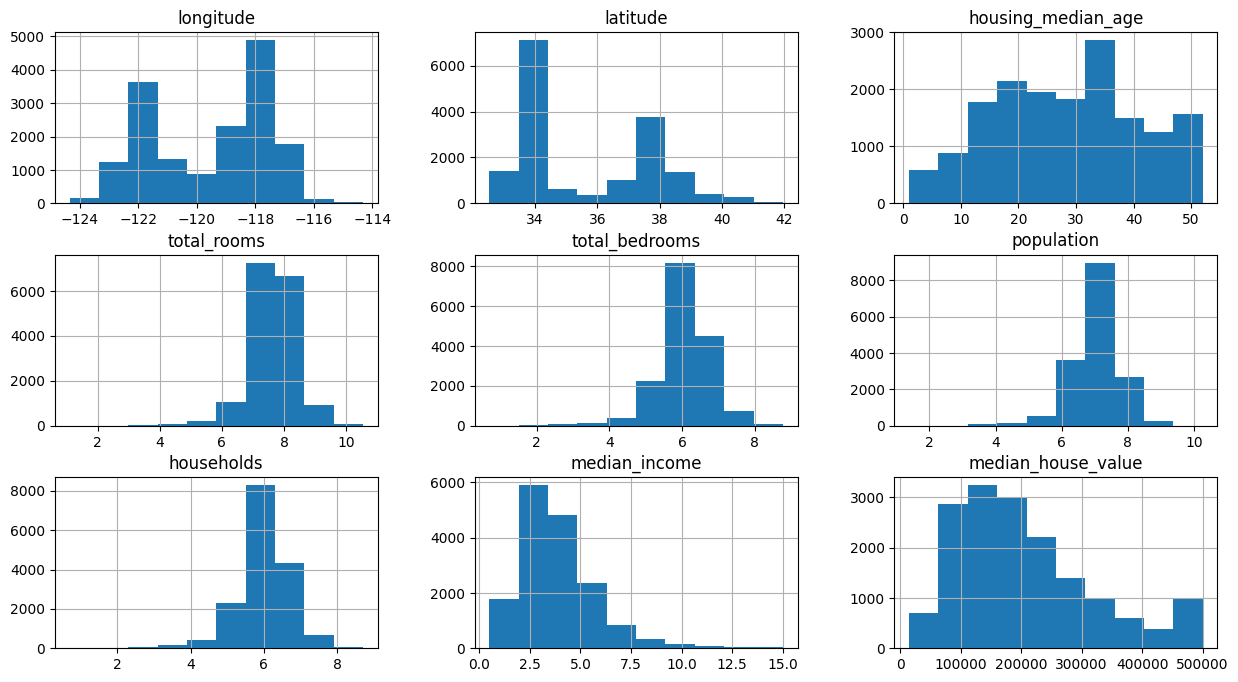

In [12]:
# Visualize the training data distribution after log transformation
train_data.hist(figsize=(15, 8))
plt.show()

In [13]:
# Convert categorical variable into dummy/indicator variables
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

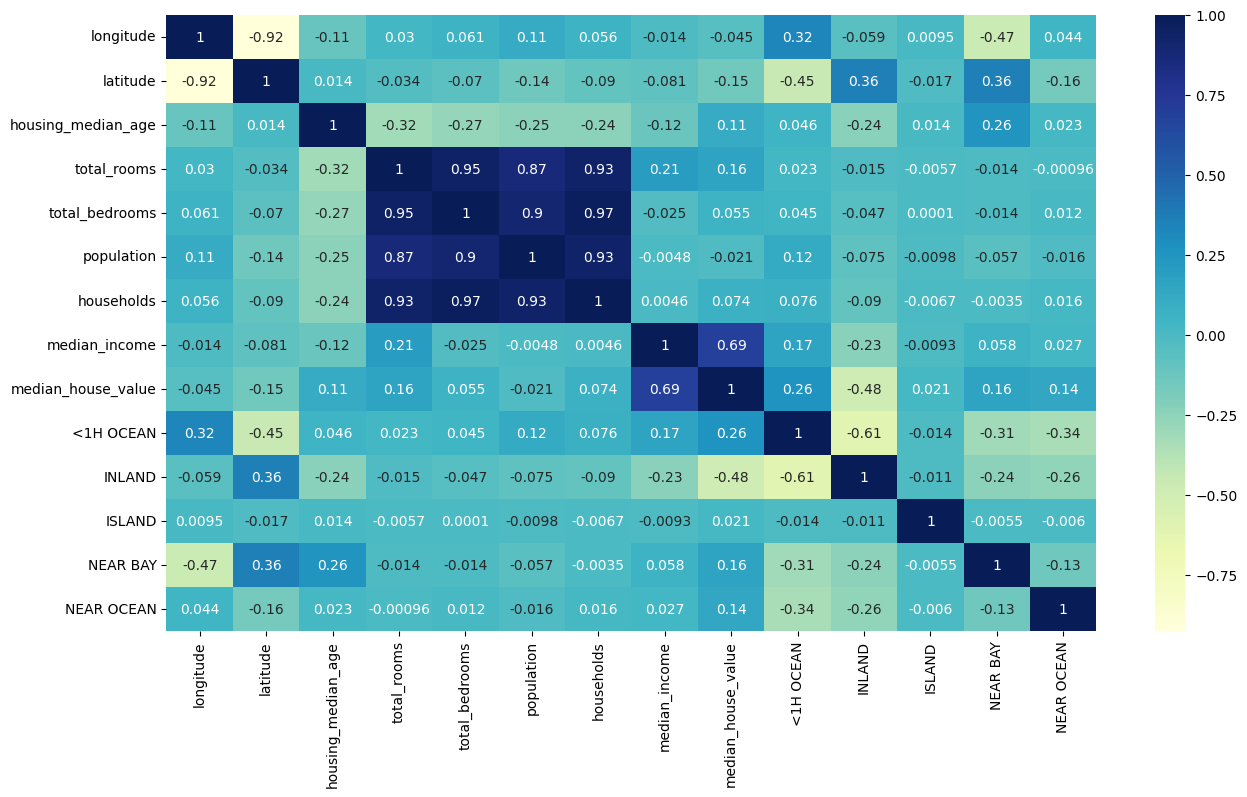

In [14]:
# Visualize the correlation matrix after encoding categorical variable
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")
plt.show()

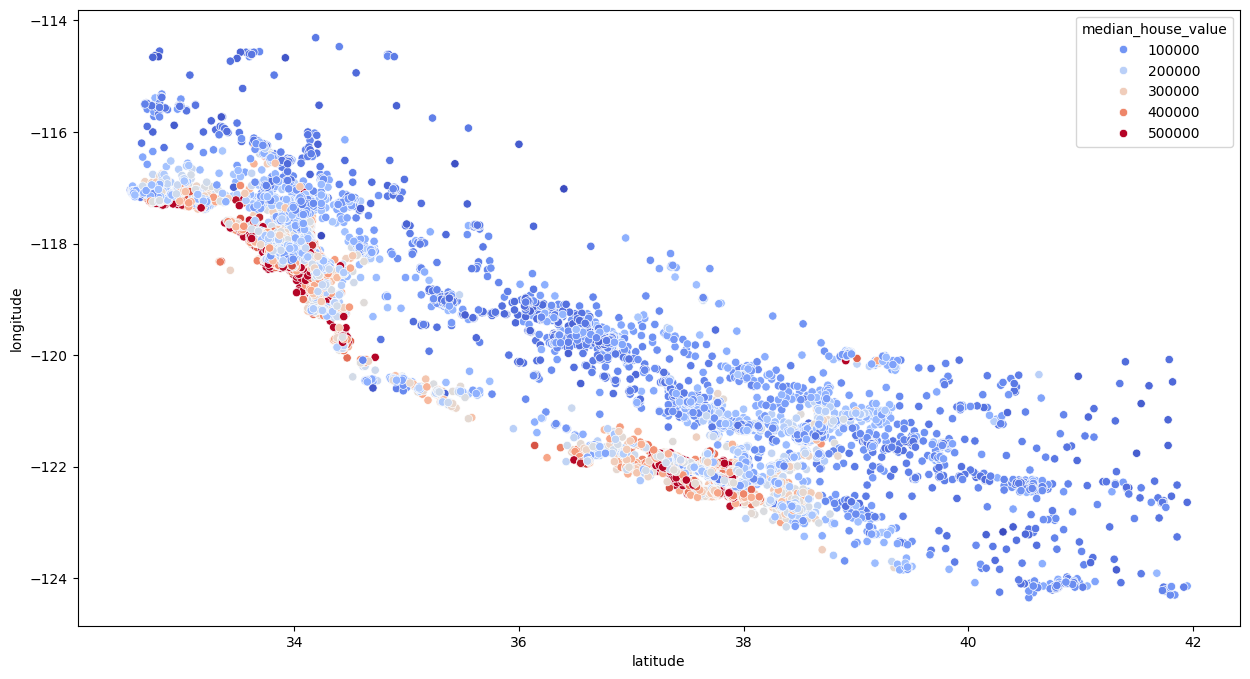

In [15]:
# Visualize geographical distribution of house values
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")
plt.show()

In [16]:
# Feature Engineering
# Create new features
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

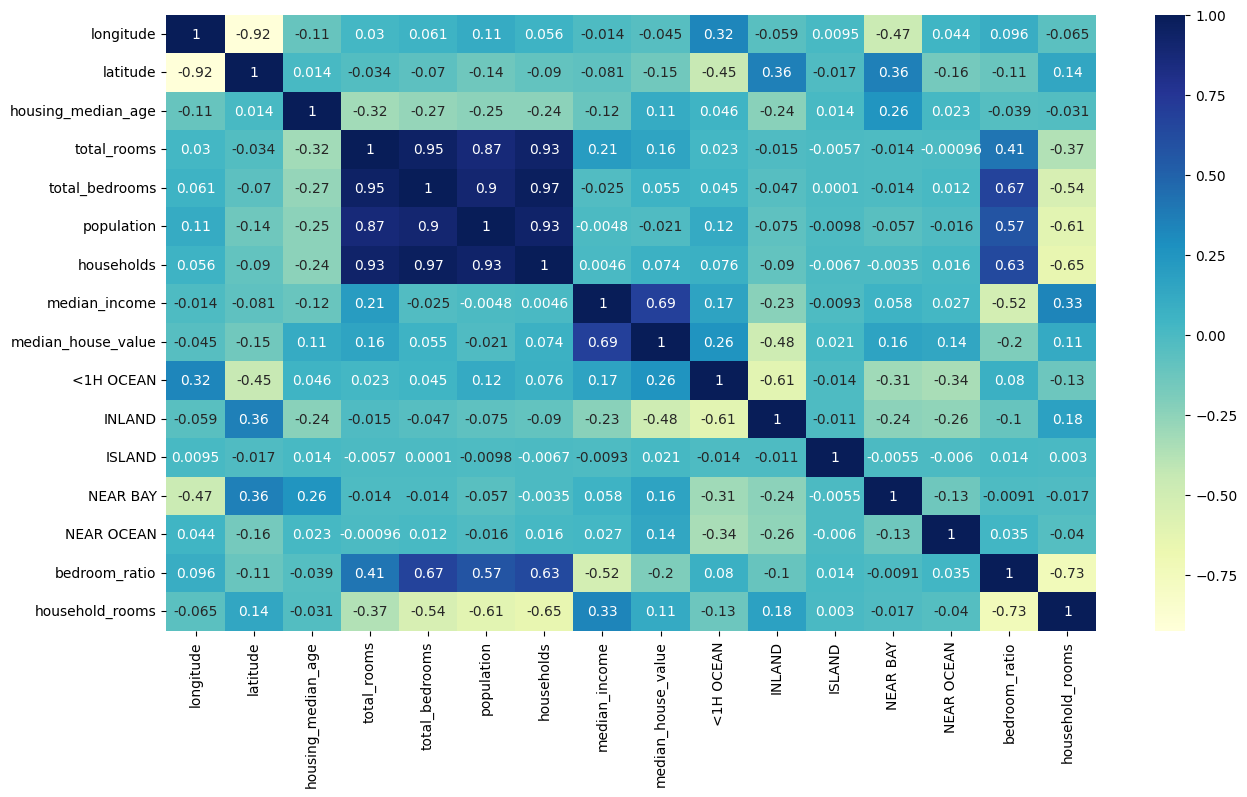

In [17]:
# Visualize the correlation matrix after feature engineering
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [18]:
# Linear Regression Model
# Standardize the features
scaler = StandardScaler()
X_train_s = scaler.fit_transform(train_data.drop(['median_house_value'], axis=1))

In [19]:
# Initialize and fit the linear regression model
reg = LinearRegression()
reg.fit(X_train_s, train_data['median_house_value'])

LinearRegression()

In [20]:
# Prepare the test data in a similar way to the training data
test_data = X_test.join(y_test)
test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)
test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)
test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [21]:
# Standardize the test features
X_test_s = scaler.transform(test_data.drop(['median_house_value'], axis=1))

In [22]:
# Evaluate the linear regression model
linear_regression_score = reg.score(X_test_s, y_test)
print(f'Linear Regression Model Score: {linear_regression_score}')

Linear Regression Model Score: 0.6781579920025397


In [24]:
# Random Forest Model
# Initialize and fit the random forest model
forest = RandomForestRegressor()
forest.fit(X_train_s, train_data['median_house_value'])

RandomForestRegressor()

In [25]:
# Evaluate the random forest model
random_forest_score = forest.score(X_test_s, y_test)
print(f'Random Forest Model Score: {random_forest_score}')

Random Forest Model Score: 0.8132088202088902
